## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images. (O)
* Apply a distortion correction to raw images. (O)
* Use color transforms, gradients, etc., to create a thresholded binary image.(O)
* Apply a perspective transform to rectify binary image ("birds-eye view"). (O)
* Detect lane pixels and fit to find the lane boundary.(O)
* Determine the curvature of the lane and vehicle position with respect to center.(O)
* Warp the detected lane boundaries back onto the original image. (O)
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.(O)

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from util import *
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)


# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

## Second, apply a distortion correction to one raw image.

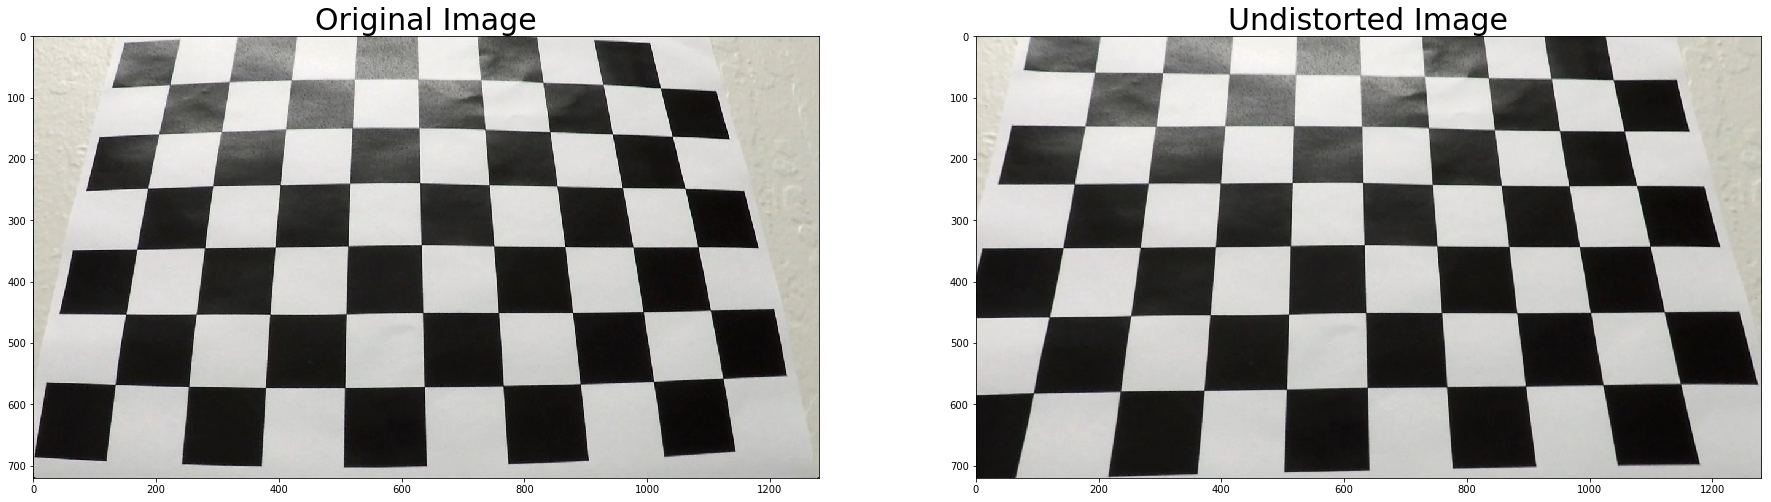

In [2]:
img = cv2.imread(images[4])
# Convert the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Undistort the image
undistorted = cal_undistort(img, objpoints, imgpoints)
# Plot the original and undistored images then save it
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig('output_images/undistort_output.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

## Try the binary threshold on one undistorted image

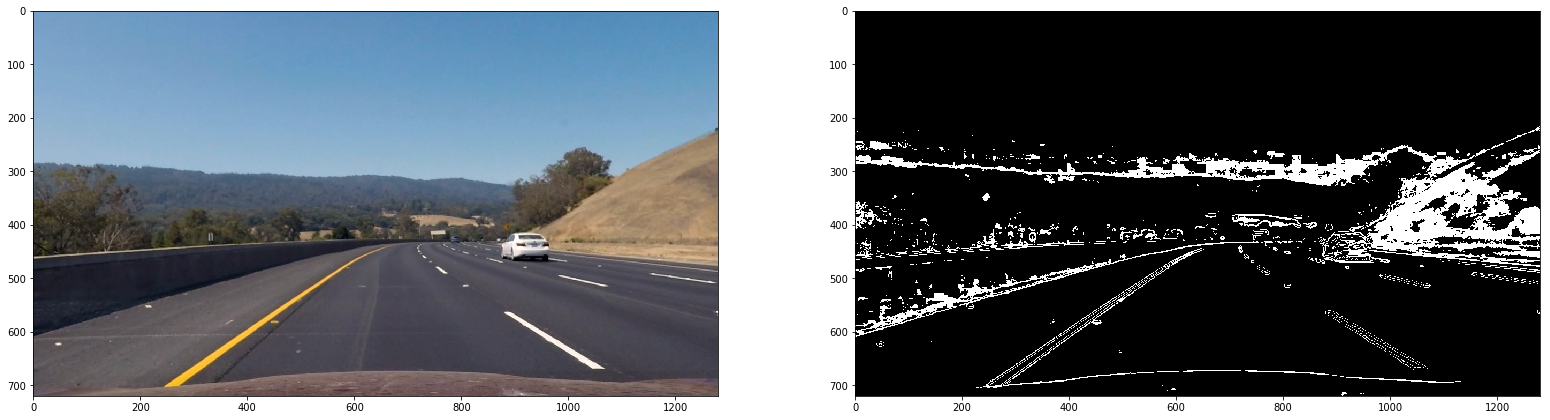

In [3]:
test_image = cv2.imread('test_images/test3.jpg')
# Convert the image to RGB
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
# Undistort the image
undist_test_image = cal_undistort(test_image,objpoints,imgpoints)

# Set the threshold and kernel size for binary output
kernel_size = 9
dir_thres = (0.7,1.3)
mag_thres = (50,100)
hls_thres = (60,90)
# Apply the magnitude, HLS and directional threshold
combined_binary = combined_select(undist_test_image, kernel_size,(0, np.pi/2), mag_thres, hls_thres)
# plot the output
f,(ax1,ax2) = plt.subplots(1,2,figsize =(27,72))
ax1.imshow(undist_test_image)
ax2.imshow(combined_binary,cmap = 'gray')

In [4]:
plt.imshow(combined_binary,cmap = 'gray')
plt.savefig('output_images/binary_combo.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

## Warp the image to get the bird-view scene

In [5]:
# Warp the image, plot it and save it
warpped_img = warp(undist_test_image)
# warpped_img, test_img = warp(undist_test_image)
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
# ax1.imshow(test_img)
# ax1.set_title('Undistorted Image with source points drawn', fontsize=20)
# ax2.imshow(warpped_img)
# ax2.set_title('Warped result with dest. points drawn', fontsize=20)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
# plt.savefig('output_images/warped_straight_lings.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

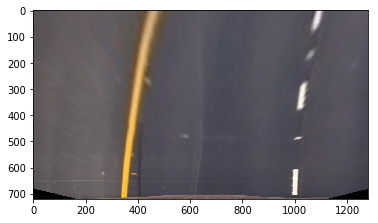

In [6]:
plt.imshow(warpped_img)

## Warp the binary image and get the lane boundary

In [8]:
# Set the threshold 
kernel_size = 9
dir_thres = (0.7,1.3)
mag_thres = (50,100)
hls_thres = (60,90)
# Apply it to the warpped image and the test_image
warpped_binary = combined_select(warpped_img,kernel_size,(0, np.pi/2), mag_thres,hls_thres)


Radius of the left curve:  805.9544027483894
Radius of the right curve:  1265.0498664770807


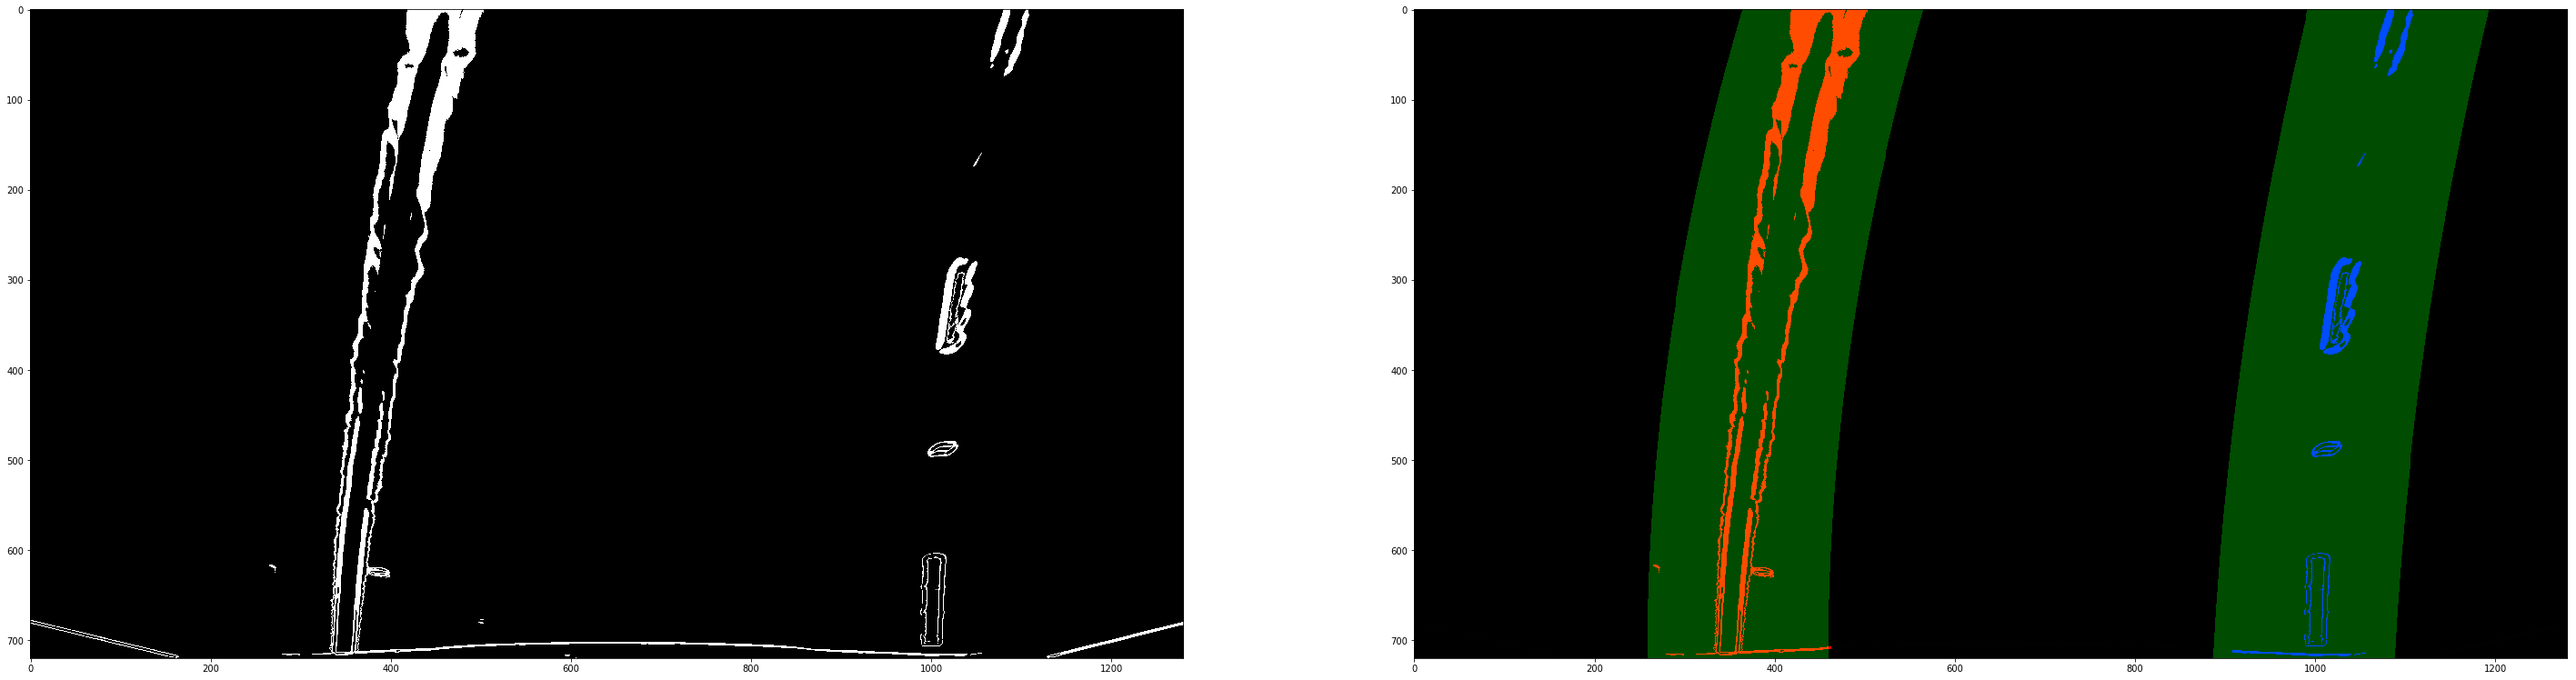

In [28]:
# Get the curve image and the radius of the curve
result,left_curverad,right_curverad = fit_polynomial(warpped_binary)
# Plot the warpped images, test_image and the result
f, (ax1,ax2) = plt.subplots(1,2,figsize= (50,150))
ax1.imshow(warpped_binary,cmap = 'gray')
ax2.imshow(result,cmap = 'gray')
plt.savefig('output_images/curve_image.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
# print out the radius of the left and right curve
print("Radius of the left curve: ",left_curverad)
print("Radius of the right curve: ",right_curverad)

## Unwarp the image

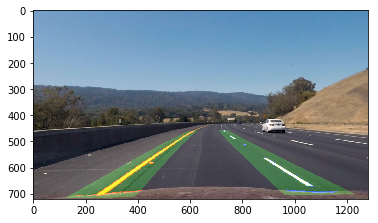

In [29]:
# Unwarp the image
unwarpped_img = unwarp(result)
# Add the umwarp result to the original image
final = cv2.addWeighted(undist_test_image, 1, unwarpped_img, 0.7, 0)
# plot the final rusult
plt.imshow(final)
plt.savefig('output_images/final.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

In [22]:
def process_image(img):
    undist_image = cal_undistort(img,objpoints,imgpoints)
    warpped_img = warp(undist_image)
    kernel_size = 9
    dir_thres = (0.7,1.3)
    mag_thres = (50,100)
    hls_thres = (60,90)
    combined_binary = combined_select(warpped_img, kernel_size,(0, np.pi/2), mag_thres, hls_thres)
    result,left_curverad,right_curverad = fit_polynomial(combined_binary)
    unwarpped_img = unwarp(result)
    final = cv2.addWeighted(undist_image, 1, unwarpped_img, 0.7, 0)
    return final

In [23]:
from moviepy.editor import VideoFileClip

In [25]:
white_output = 'output_images/test_output.mp4'
# clip1 = VideoFileClip("project_video.mp4").subclip(0,2)
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) 
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video output_images/test_output.mp4
[MoviePy] Writing video output_images/test_output.mp4


100%|█████████▉| 1260/1261 [18:50<00:00,  1.11it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_images/test_output.mp4 

CPU times: user 19min 8s, sys: 33.7 s, total: 19min 42s
Wall time: 18min 51s
